import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

##Cargando el Dataset de los Pingüinos

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


##Verificar correlacion de variables

In [ ]:
select_dtypes = penguins.select_dtypes(include=[np.number])#exluyo las variables string
corr = select_dtypes.corr()
corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


## Estandarización de Variables

In [ ]:
X = penguins.loc[:, ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
Y = penguins.loc[:, ["species"]]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

##Cálculo de los componentes principales

In [ ]:
# Handle missing values using imputation
!pip install scikit-learn
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.decomposition import PCA # Import the PCA class
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Now apply PCA (using a different variable name)
pca_model = PCA(n_components=2) # Use a different variable name to avoid overwriting the PCA class
components = pca_model.fit_transform(X_scaled)
pca_model.components_

array([[ 0.45525033, -0.40033468,  0.57601332,  0.54835019],
       [ 0.59703114,  0.79776657,  0.0022822 ,  0.08436292]])

##Varición explicada

In [ ]:
cumVar = pd.DataFrame(np.cumsum(pca_model.explained_variance_ratio_)*100, # Use pca_model instead of PCA
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(pca_model.explained_variance_ratio_*100, columns=["VarPerc"]) # Use pca_model instead of PCA
pd.concat([expVar, cumVar], axis=1)\
    .rename(index={0: "PC1", 1: "PC2"})

,VarPerc,cumVarPerc
PC1,68.843878,68.843878
PC2,19.312919,88.156797


##Visualización

<Axes: xlabel='PC1', ylabel='PC2'>

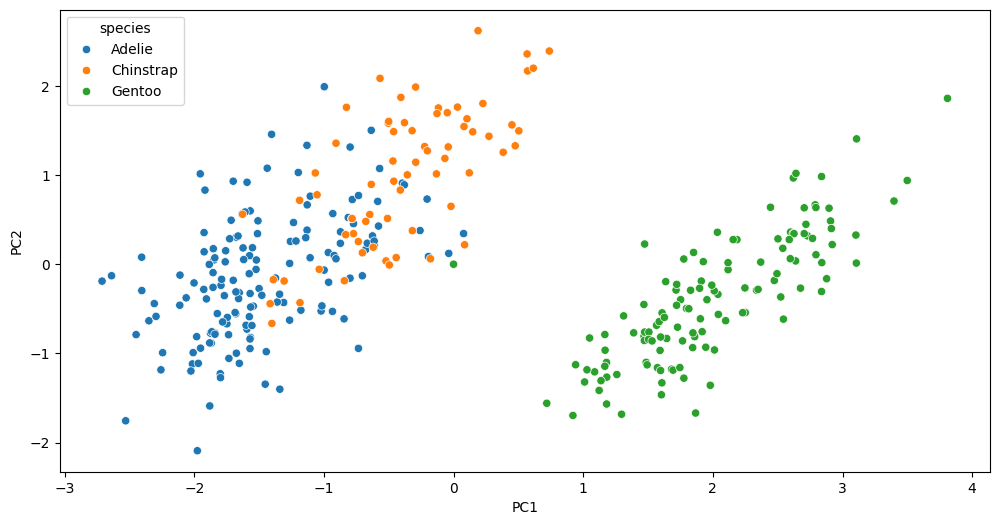

In [ ]:
componentsDf = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])
pcaDf = pd.concat([componentsDf, Y], axis=1)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=pcaDf, x="PC1", y="PC2", hue="species")

##Biplot

In [ ]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()